# Information values in Python

This notebook teaches the user how to use `iv_numeric(·)` to calculate the information value of any given feature.

The same logic applies when using `iv_categorical(·)`.

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import information_values as iv
from sklearn import datasets

Create a made-up dataset

In [2]:
# Create a made up dataset using sklearn.datasets.make_classification
X = datasets.make_classification(n_samples=10000, n_features=5, n_informative=3, random_state=0)
# Turn X into a pandas DataFrame
df = pd.concat([pd.DataFrame(data=X[0], columns=['f1','f2','f3','f4','f5']),
                pd.DataFrame({'target':X[1]})], axis=1)
# Print 5 rows
df.head(5)

,f1,f2,f3,f4,f5,target
0,2.329205,-2.105641,-0.981502,-1.679588,2.081280,1
1,0.990067,1.862806,1.403027,-1.148238,-1.901762,1
2,1.669082,-1.987684,0.906557,-1.820797,1.140290,0
3,-1.153876,0.409411,-0.805778,1.246085,-0.011993,0
4,-0.841134,1.145156,-0.512235,0.948967,-0.654546,0


# Information value for a single feature
Calculate IV for `f1`

In [3]:
iv.iv_numeric(target=df['target'], feature=df['f1'], feature_name='f1', bins=10, return_table=False)

['f1', 4.812690038605772]

Same procedure but `return_table=True`

In [4]:
# Store output in `t`
t = iv.iv_numeric(target=df['target'], feature=df['f1'], feature_name='f1', bins=10, return_table=True)
# Print `t`
t

,bin,count,bads,goods,bads_pct,goods_pct,woe,iv
0,1,1000,52,948,0.010404,0.189524,18.216190,3.262885
1,2,1000,100,900,0.020008,0.179928,8.992803,1.438129
2,3,1000,240,760,0.048019,0.151939,3.164134,0.328817
3,4,1000,559,441,0.111845,0.088165,0.788278,-0.018666
4,5,1000,675,325,0.135054,0.064974,0.481096,-0.033715
5,6,1000,719,281,0.143858,0.056178,0.390508,-0.034240
6,7,1000,686,314,0.137255,0.062775,0.457360,-0.034064
7,8,1000,687,313,0.137455,0.062575,0.455240,-0.034088
8,9,1000,661,339,0.132253,0.067773,0.512449,-0.033043
9,10,1000,619,381,0.123850,0.076170,0.615017,-0.029324


Print the IV for `f1`

In [5]:
t['iv'].sum()

4.812690038605772

# Information values for many features
Get the Information Value for every feature and sort the result by each feature's importance.

In [6]:
# Create empty list
ivs = []
# Append each output (which comes in the form of [feature_name, IV]) to the list
for feature in df.columns[:5]:
    ivs.append(iv.iv_numeric(target=df['target'], feature=df[feature], feature_name=feature, bins=10, return_table=False))
# Turn the list into a pandas.DataFrame
ivs = pd.DataFrame(columns=['feature','iv'], data=ivs)
# Sort by feature importance
ivs = ivs.sort_values('iv', ascending=False).reset_index(drop=True)
ivs

,feature,iv
0,f4,17.019029
1,f1,4.812690
2,f5,0.349871
3,f3,0.055104
4,f2,0.022747


Same procedure, but visualize the relationship between each feature and the target.


 f1's IV: 4.8127


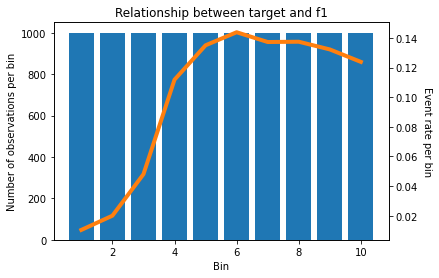


 f2's IV: 0.0227


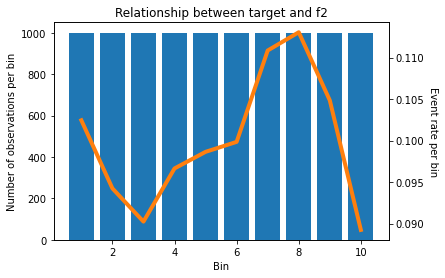


 f3's IV: 0.0551


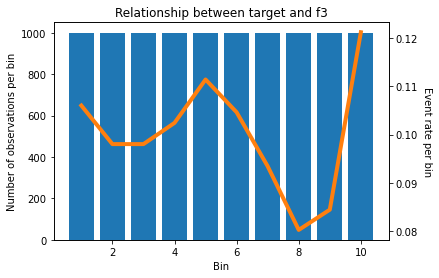


 f4's IV: 17.019


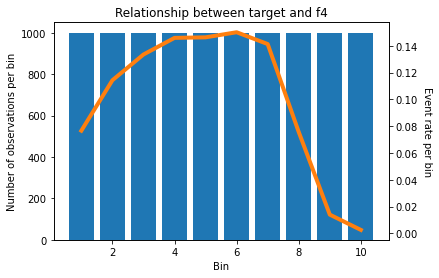


 f5's IV: 0.3499


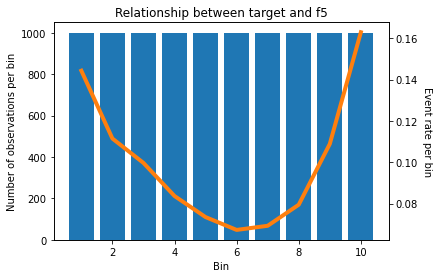

In [7]:
for col in df.columns[:5]:
    # Store table in `t`
    t = iv.iv_numeric(target=df['target'], feature=df[col], feature_name=col, bins=10, return_table=True)
    # Print the feature's IV
    print('\n', col + "'s IV:", np.round(t['iv'].sum(), 4))
    # Bar chart on main y-axis
    fig, ax1 = plt.subplots()
    ax1.bar(t['bin'], t['count'])
    ax1.set_xlabel('Bin')
    ax1.set_ylabel('Number of observations per bin')
    # Event rate on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(t['bin'], t['bads_pct'], color='C1', lw=4)
    ax2.set_ylabel('Event rate per bin', rotation=270, labelpad=14)
    # Set title
    plt.title('Relationship between target and ' + col)
    plt.show()